# Association Rule Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#!pip install mlxtend

In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

In [10]:
urlData ='https://raw.githubusercontent.com/dupadhyaya/mypractise/main/data/retail.csv'

In [11]:
df = pd.read_csv(urlData)
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [13]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)
# 9 items

{'Milk', 'Bagel', 'Meat', nan, 'Eggs', 'Diaper', 'Bread', 'Wine', 'Cheese', 'Pencil'}


In [14]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [15]:
ohe_df

,Bagel,Milk,NaN,Meat,Eggs,Diaper,Bread,Wine,Cheese,Pencil
0,0,0,0,1,1,1,1,1,1,1
1,0,1,0,1,0,1,1,1,1,1
2,0,1,1,1,1,0,0,1,1,0
3,0,1,1,1,1,0,0,1,1,0
4,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
310,0,0,1,0,1,0,1,0,1,0
311,0,1,1,1,0,0,0,0,0,1
312,0,0,0,1,1,1,1,1,1,1
313,0,0,1,1,0,0,0,0,1,0


In [20]:
# freq items
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, verbose=1)
freq_items.sort_values(by='support', ascending=False).head(7)

Processing 4 combinations | Sampling itemset size 4 3


/Users/du/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
2,0.869841,(nan)
6,0.504762,(Bread)
8,0.501587,(Cheese)
1,0.501587,(Milk)
3,0.476190,(Meat)
4,0.438095,(Eggs)
7,0.438095,(Wine)


In [21]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bagel),(nan),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902,-0.147743
1,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650,0.402687
2,(Milk),(nan),0.501587,0.869841,0.409524,0.816456,0.938626,-0.026778,0.709141,-0.115976
3,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053
4,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148,0.350053


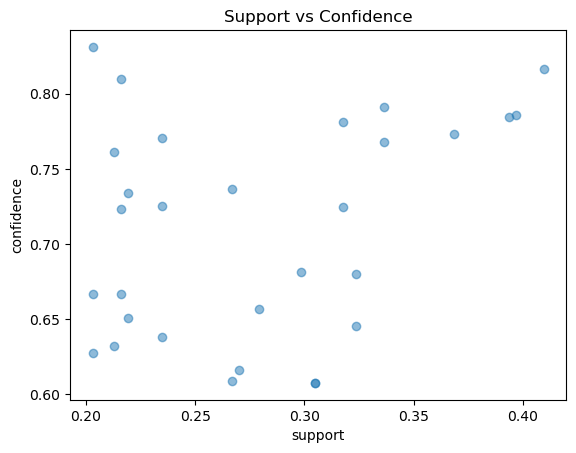

In [22]:
# Support vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

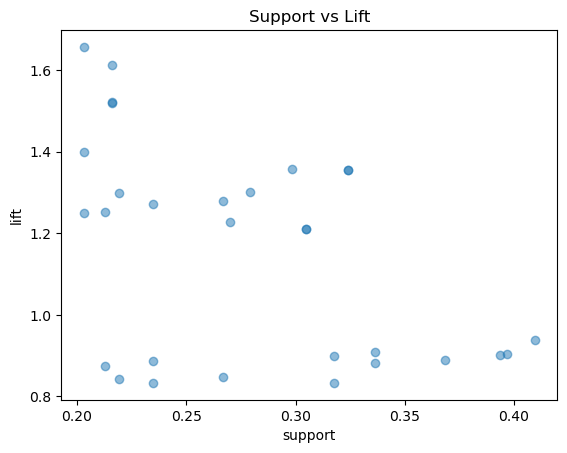

In [26]:
#Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show();

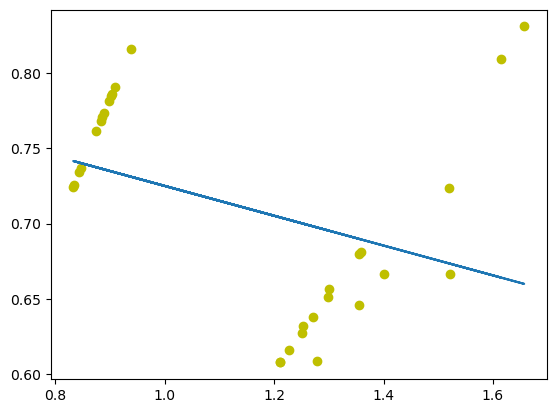

In [28]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))
plt.show();

# Links
- https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c